# Importing neccessry liabrary

In [17]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [18]:
df_test = pd.read_csv('SalaryData_Test(1).csv')
df_train = pd.read_csv('SalaryData_Train(1).csv')

df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [19]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [22]:
df_test.isna().value_counts()

age    workclass  education  educationno  maritalstatus  occupation  relationship  race   sex    capitalgain  capitalloss  hoursperweek  native  Salary
False  False      False      False        False          False       False         False  False  False        False        False         False   False     15060
dtype: int64

In [23]:
df_train.isna().value_counts()

age    workclass  education  educationno  maritalstatus  occupation  relationship  race   sex    capitalgain  capitalloss  hoursperweek  native  Salary
False  False      False      False        False          False       False         False  False  False        False        False         False   False     30161
dtype: int64

In [24]:
df_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

### Lable encoding for non numeric columns

In [25]:
col = ['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

label_encode = preprocessing.LabelEncoder()

for i in col:
    df_train[i] = label_encode.fit_transform(df_train[i])
    df_test[i] = label_encode.fit_transform(df_test[i])

In [26]:
x_train = df_train.iloc[:, 0:13]
y_train = df_train.iloc[:, 13]
x_test = df_test.iloc[:, 0:13]
y_test = df_test.iloc[:, 13]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(30161, 13) (30161,)
(15060, 13) (15060,)


In [27]:
# Unique target class count, train data

y_train.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

## Visualising data using TSNE

In [28]:
from sklearn.manifold import TSNE
import seaborn as sns

In [29]:
tsne = TSNE(n_components=3, verbose=1, random_state=123)
z = tsne.fit_transform(x_train)

df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30161 samples in 0.142s...
[t-SNE] Computed neighbors for 30161 samples in 7.524s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30161
[t-SNE] Computed conditional probabilities for sample 2000 / 30161
[t-SNE] Computed conditional probabilities for sample 3000 / 30161
[t-SNE] Computed conditional probabilities for sample 4000 / 30161
[t-SNE] Computed conditional probabilities for sample 5000 / 30161
[t-SNE] Computed conditional probabilities for sample 6000 / 30161
[t-SNE] Computed conditional probabilities for sample 7000 / 30161
[t-SNE] Computed conditional probabilities for sample 8000 / 30161
[t-SNE] Computed conditional probabilities for sample 9000 / 30161
[t-SNE] Computed conditional probabilities for sample 10000 / 30161
[t-SNE] Computed conditional probabilities for sample 11000 / 30161
[t-SNE] Computed conditional probabilities for sample 12000 / 30161
[t-SNE] Computed conditional probabilities for sam

[Text(0.5, 1.0, 'Salary data T-SNE projection')]

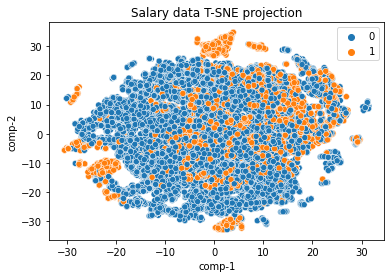

In [30]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                data=df).set(title="Salary data T-SNE projection")

[Text(0.5, 1.0, 'Salary data T-SNE projection')]

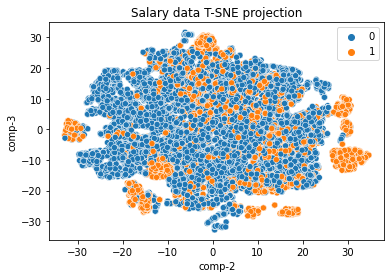

In [31]:
df["comp-3"] = z[:, 2]

sns.scatterplot(x="comp-2", y="comp-3", hue=df.y.tolist(),
                data=df).set(title="Salary data T-SNE projection")

# Build Support Vector Machine model

In [32]:
# Grid search
# Time required to execute the grid code is unknown, went into infinite loop

clf = SVC()

#param_grid = [{'kernel':['rbf'], 'gamma':[50], 'C':[15,13,12,10,0.1] }]
#gsv = GridSearchCV(clf, param_grid, cv=5)
#gsv.fit(x_train, y_train)

In [33]:
# rbf kernal  

clf = SVC(C= 0.1, gamma = 50, class_weight='balanced')

clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred)

print("Accuracy =", acc)
print('f1 score :', f1)

confusion_matrix(y_test, y_pred)

Accuracy = 75.76361221779548
f1 score : 0.07030056036678553


array([[11272,    88],
       [ 3562,   138]], dtype=int64)

In [34]:
# poly kernel 

clf = SVC(kernel='poly', class_weight='balanced')

clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred)

print("Accuracy : ", acc)
print('f1 score :', f1)

confusion_matrix(y_test, y_pred)

Accuracy :  79.47543160690572
f1 score : 0.2938085446652958


array([[11326,    34],
       [ 3057,   643]], dtype=int64)